## 1.  Import all necessary packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Read the dataset src folder.

In [4]:
movie_df = pd.read_csv('movie_rating.csv')

## 3. Look at the inside of the dataset

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 5 columns):
movie_name      3220 non-null object
release_year    3220 non-null object
imdb            3220 non-null float64
metascore       3220 non-null int64
votes           3220 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 125.9+ KB


In [6]:
movie_df.head(10)

,movie_name,release_year,imdb,metascore,votes
0,The Lord of the Rings: The Two Towers,(2002),8.7,87,1363710
1,Catch Me If You Can,(2002),8.1,75,727828
2,The Pianist,(2002),8.5,85,650794
3,City of God,(2002),8.6,79,650089
4,Spider-Man,(2002),7.3,73,645782
5,Star Wars: Episode II - Attack of the Clones,(2002),6.6,54,579350
6,Harry Potter and the Chamber of Secrets,(2002),7.4,63,497828
7,The Bourne Identity,(2002),7.9,68,477811
8,Minority Report,(2002),7.6,80,472824
9,Ice Age,(2002),7.5,60,406031


## 4. Cleaning the dataset

In [7]:
movie_df['release_year'].unique()

array(['(2002)', '(2003)', '(2004)', '(I) (2004)', '(2005)', '(I) (2005)',
       '(2006)', '(I) (2006)', '(2007)', '(I) (2007)', '(2008)',
       '(I) (2008)', '(2009)', '(I) (2009)', '(2010)', '(I) (2010)',
       '(2011)', '(I) (2011)', '(2012)', '(I) (2012)', '(2013)',
       '(I) (2013)', '(2014)', '(I) (2014)', '(II) (2014)', '(2015)',
       '(I) (2015)', '(II) (2015)', '(2016)', '(II) (2016)', '(I) (2016)',
       '(IX) (2016)', '(2017)', '(I) (2017)', '(2018)', '(I) (2018)',
       '(III) (2018)', '(2019)', '(I) (2019)'], dtype=object)

In [8]:
# There is some noise in movie release year
# Let remove it.

movie_df.loc[:, 'release_year'] = movie_df['release_year'].str[-5:-1].astype(int)
movie_df['release_year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [50]:
movie_df.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,19.0
max,9.0,100.0


In [9]:
# Two ratings are different scale
# We can multiply by 10 imdb to look nice in plot

movie_df['n_imdb'] = movie_df['imdb'] * 10
movie_df.head()

,movie_name,release_year,imdb,metascore,votes,n_imdb
0,The Lord of the Rings: The Two Towers,2002,8.7,87,1363710,87.0
1,Catch Me If You Can,2002,8.1,75,727828,81.0
2,The Pianist,2002,8.5,85,650794,85.0
3,City of God,2002,8.6,79,650089,86.0
4,Spider-Man,2002,7.3,73,645782,73.0


## 5. Plotting and analyzing the distributions

No handles with labels found to put in legend.
/home/mohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'uper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


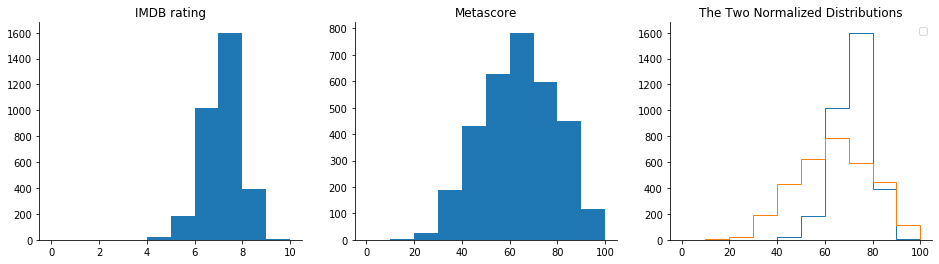

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_df['imdb'], bins=10, range = (0, 10))   # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_df['metascore'], bins=10, range=(0, 100))   # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_df['n_imdb'], bins=10, range=(0, 100), histtype = 'step')
ax3.hist(movie_df['metascore'], bins=10, range=(0, 100), histtype = 'step')
ax3.legend(loc = 'uper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()